## __Measuring Ideal Gas Constant__ ##

Group: Logan MacHale, Jaden Majid

## Familiarization Notes - Feb 25 ##

__Clarify Objective__

We will be measuring the gas constant by assembling a force meter and using it to measure the force of the gas on various weights.

My hypothesis is that the gas constant for air can be measured using our apparatus and it will be similar to the scientifically accepted value of ~8.31.

__Physical meanings__

- Volume(V):$m^3$
- Force(F):$N$
- Pressure(P):$Pa$
- Mass(m): $kg$
- Acceleration(a): $m/s^2$
- Moles(n): $mol$
- Temperature(T): $K$
- R(gas constant): $J/(K*mol)$

__Relate Quantities__

Think of all of the equations and tools you will need on the path from raw data to a final result.

What statistical tools do you need?

__What graphs will you do?__

1/V as a function of m


What other equations do I need?

- $V_{cylinder}=\pi*r^2*h$
- $A_{circle}=\pi*r^2$
- $P=F/A$
- $1/V=\frac{P_a}{nRT}-m\frac{g}{AnRT}$

__Logbook__

__15:05__ First run of data collection started

__15:45__ First run of data collection complete

__16:00__ Friction must be taken into account

measurements were taken by hanging weights from syringe, but this set of data collected was of low quality as the gas was leaking slightly from the syringe and so it will be disregarded for analysis.

## Mar 1 ##

__Equation with friction:__ $\dfrac{1}{V} = -m * \dfrac{g}{AnRT}+\dfrac{AP_a+F_k}{AnRT}$

__Logbook:__

__15:15__ second run of data collection started using same weight handing technique

__15:20__ realized we need to account for the fact that the syringe has a relatively large range of values for 1/V for which it will be at equilibrium due to static friction

Spent majority of remaining time devising method of approximating true equilibrium. This will be done by taking the maximum and minimum 1/V and averaging them to calculate the actual equilibrium value of 1/V.



## Mar 8 ##

Taking measurements of the average of final volumes due to expansion and contraction. Weights were pulled down from equilibrium position and allowed to contract to equilibrium and then pushed upwards and allowed to expand to equilibrium. These were averaged as 1/V.

__14:05__ Measurements started

__14:30__ Data set complete with data for every 100g of weight

Can likely get better results by using volume as the independent variable and the average of the applied force to "break" equilibrium in either direction as the dependent variable, but analysis of the current data will be completed and this described method will be done next week.

__Plotting applied force dependant on 1/V (will be done next week):__

$F_{s} + AP_{a} + \dfrac{1}{V} *  AnRT = - F_a$

__Calculating area of syringe plunger:__

$h = 57mm = 57E-3 m$

$V = 10mL = 10cm^3  = 1E-5 m^3$

$V = A*h$

$A = \dfrac{V}{h}$

$A = 1.7544E-4 m^2$

Temperature Mar 8:

$T = 295.15 K$

Atmospheric Pressure Mar 8:

$P_a = 101.3 kPa$

__Calculating moles of gas in 2mL of air:__

$\rho = 1.168 kg/ m^3$

$\sigma = 28.9647E-3 kg/mol$

$\dfrac{\rho}{\sigma} = 40.325 mol/m^3$

$\dfrac{\rho}{\sigma}*V = n$
$n = 8.065E-5 mol$

P -> Pa
V -> m^3
n -> mol
T -> K
R -> J/(K*mol)

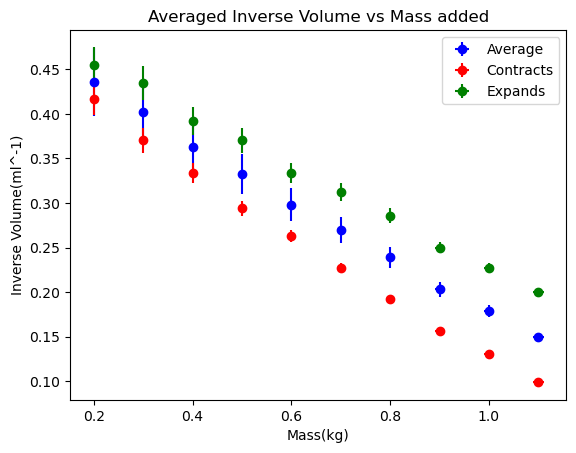

In [1]:
"""Code for plotting data"""

import matplotlib.pyplot as plt
import numpy as np

fname = 'AveragedData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(0, 1, 2, 3))

x = data[:, 0]
y = data[:, 2]
avg_x_sigma = data[:, 1]
avg_y_sigma = data[:, 3]

plt.errorbar(x, y, avg_y_sigma, avg_x_sigma, "bo")

fname = 'GasContractsData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(1, 2, 6, 7))

x = data[:, 0]
y = data[:, 2]
con_x_sigma = data[:, 1]
con_y_sigma = data[:, 3]

plt.errorbar(x, y, yerr=con_y_sigma, xerr=con_x_sigma, fmt='ro')

fname = 'GasExpandsData.csv'

data = np.loadtxt(fname, delimiter=',', comments='#',
                  usecols=(1, 2, 6, 7))

x = data[:, 0]
y = data[:, 2]
ex_x_sigma = data[:, 1]
ex_y_sigma = data[:, 3]

plt.errorbar(x, y, yerr=ex_y_sigma, xerr=ex_x_sigma, fmt='go')

plt.title("Averaged Inverse Volume vs Mass added")
plt.legend(["Average", "Contracts", "Expands"])
plt.xlabel("Mass(kg)")
plt.ylabel("Inverse Volume(ml^-1)")

plt.show()

In [2]:
"""Code for fitting and finding chi squared of data vs fit"""

from scipy.optimize import curve_fit

def lin_fit(x, k, b):
    return -k*x+b

guesses = (-.320,.500)


fit_params, fit_cov = curve_fit(lin_fit, x, y, sigma=avg_y_sigma, p0=guesses,
                                maxfev=10**5)

# read out parameter results
param_names = ['slope', '1/v0']

fit_params_error = np.sqrt(np.diag(fit_cov))

print("Fit parameters:")
for i in range(len(fit_params)):
    print('{} = {:.3e} +/- {:.3e}'.format(param_names[i],
                                          fit_params[i],
                                          fit_params_error[i]))


# function that  calculates the chi square value of a fit
def chi_square(fit_parameters, x, y, sigma):
    #
    return np.sum((y-lin_fit(x, *fit_parameters))**2/sigma**2)


# calculate and print chi square as well as the per degree-of-freedom value
chi2 = chi_square(fit_params, x, y, avg_y_sigma)
dof = len(x) - len(fit_params)
print("\nGoodness of fit - chi square measure:")
print("Chi2 = {}, Chi2/dof = {}\n".format(chi2, chi2/dof))

Fit parameters:
slope = 2.796e-01 +/- 5.074e-03
1/v0 = 5.067e-01 +/- 4.936e-03

Goodness of fit - chi square measure:
Chi2 = 0.7066533676354002, Chi2/dof = 0.08833167095442503



In [3]:
"""Code for converting fit to R"""

n = 8.065E-5
g = 9.81
A = 1.7544E-4
T = 295.15

print(fit_params)
print(fit_params_error)

pct_u_k = (fit_params_error[0]/fit_params[0])

R_in_mL = g/(fit_params[0]*n*A*T)
uR_ml = R_in_mL * g * fit_params_error[0] / (A*n*T*fit_params[0])

print("R in mL: ", R_in_mL, "+-", uR_ml)
print("R in ml percent u: {:0.2f}%".format((uR_ml/R_in_mL)))

uR_ml = R_in_mL * g * fit_params_error[0] / (A*n*T*fit_params[0])

R_in_m3 = R_in_mL*1E-06
uR_in_m3 = R_in_m3 * g * fit_params_error[0] / (A*n*T*fit_params[0])
print(uR_in_m3)
print("R in m^3: ", R_in_m3)
print(fit_params_error)


[0.27961849 0.50668595]
[0.00507434 0.00493604]
R in mL:  8400929.651802372 +- 358124714552.37787
R in ml percent u: 42629.18%
358124.7145523778
R in m^3:  8.400929651802372
[0.00507434 0.00493604]
